In [1]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import safeopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

In [2]:
bounds =[(-2.5,2.5)]
x0 = np.zeros((1, len(bounds)))

def global_function(x1,x2,x3):
    "Each agent contributes to a different part of the global function"
    
    result =  np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)
    
    #define guassian noise
    # noise = np.random.normal(0,0.08**2)
    # noise = np.random.normal(loc=0.0, scale=0.1)

    return result


class Agent:
    def __init__(self,bounds,id,x0,noise_var=0.05**2):

        self.bounds = bounds
        self.id = id
        self.kernel =GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.)
        self.x0 = x0
        self.parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)
        self.kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.)

        self.gp = GPy.models.GPRegression(x0,global_function(x0,x0,x0) , self.kernel, noise_var=noise_var) #initiallize gp with initial safe point
        self.opt = safeopt.SafeOpt(self.gp, self.parameter_set, 0.0,beta=3.5,threshold=0.2)

    def predict(self):
        return self.opt.optimize()
    
    def update(self,x_next,y_meas):
        self.opt.add_new_data_point(x_next, y_meas)

    def plot_gp(self):
        self.opt.plot(1000)
        plt.title(f"Agent {self.id}")  
        plt.plot(self.parameter_set, global_function(self.parameter_set,self.parameter_set,self.parameter_set), "r--", label="True function")   
        plt.legend()

def plot_true_function(bounds):
    parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)
    # Assuming global_function can handle vectorized inputs properly
    y_true = global_function(parameter_set, parameter_set, parameter_set)
    plt.plot(parameter_set, y_true, "r--", label="True function")
    plt.legend()


In [3]:
# Example usage
agent1 = Agent(bounds, 0, x0)
agent2 = Agent(bounds, 1, x0)
agent3 = Agent(bounds, 2, x0)



agents = [agent1,agent2,agent3]

Agent predictions:  [-0.19269269] [-0.19269269] [-0.19269269]
Agent predictions:  [-0.72322322] [-0.72322322] [-0.72322322]
Agent predictions:  [-1.08858859] [-1.08858859] [-1.08858859]
Agent predictions:  [0.27277277] [0.27277277] [0.27277277]
Agent predictions:  [0.55805806] [0.55805806] [0.55805806]
Agent predictions:  [0.87337337] [0.87337337] [0.87337337]
Agent predictions:  [1.22372372] [1.22372372] [1.22372372]
Agent predictions:  [-0.65315315] [-0.65315315] [-0.65315315]
Agent predictions:  [-0.3978979] [-0.3978979] [-0.3978979]
Agent predictions:  [-0.75325325] [-0.75325325] [-0.75325325]
Agent predictions:  [-0.12762763] [-0.12762763] [-0.12762763]
Agent predictions:  [-0.73323323] [-0.73323323] [-0.73323323]
Agent predictions:  [-0.15265265] [-0.15265265] [-0.15265265]
Agent predictions:  [-0.71821822] [-0.71821822] [-0.71821822]
Agent predictions:  [-0.17267267] [-0.17267267] [-0.17267267]
Agent predictions:  [-0.46296296] [-0.46296296] [-0.46296296]
Agent predictions:  [-0

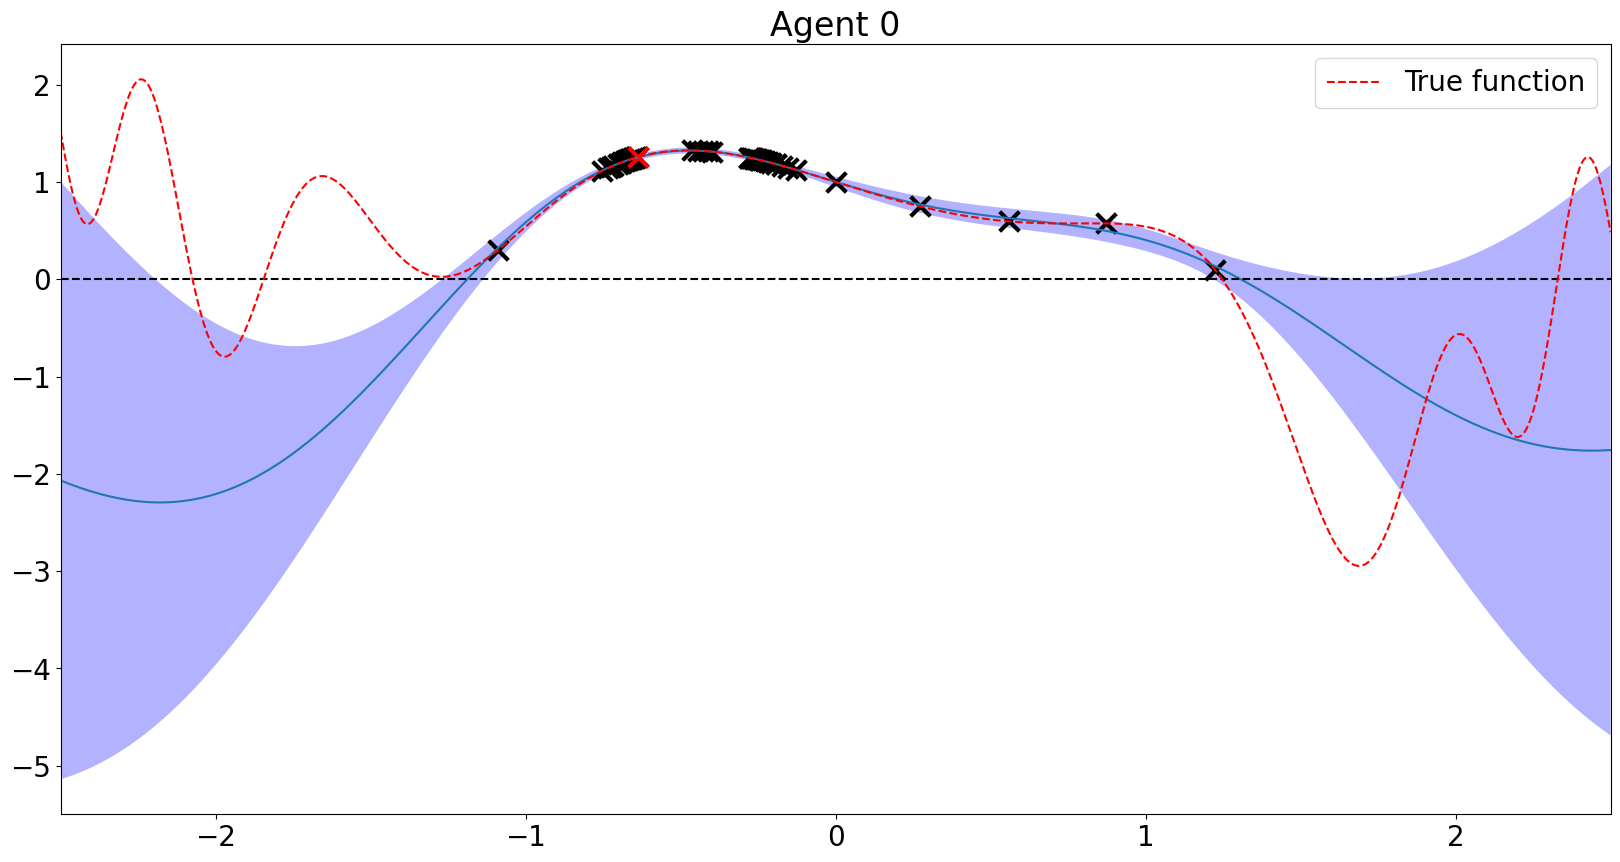

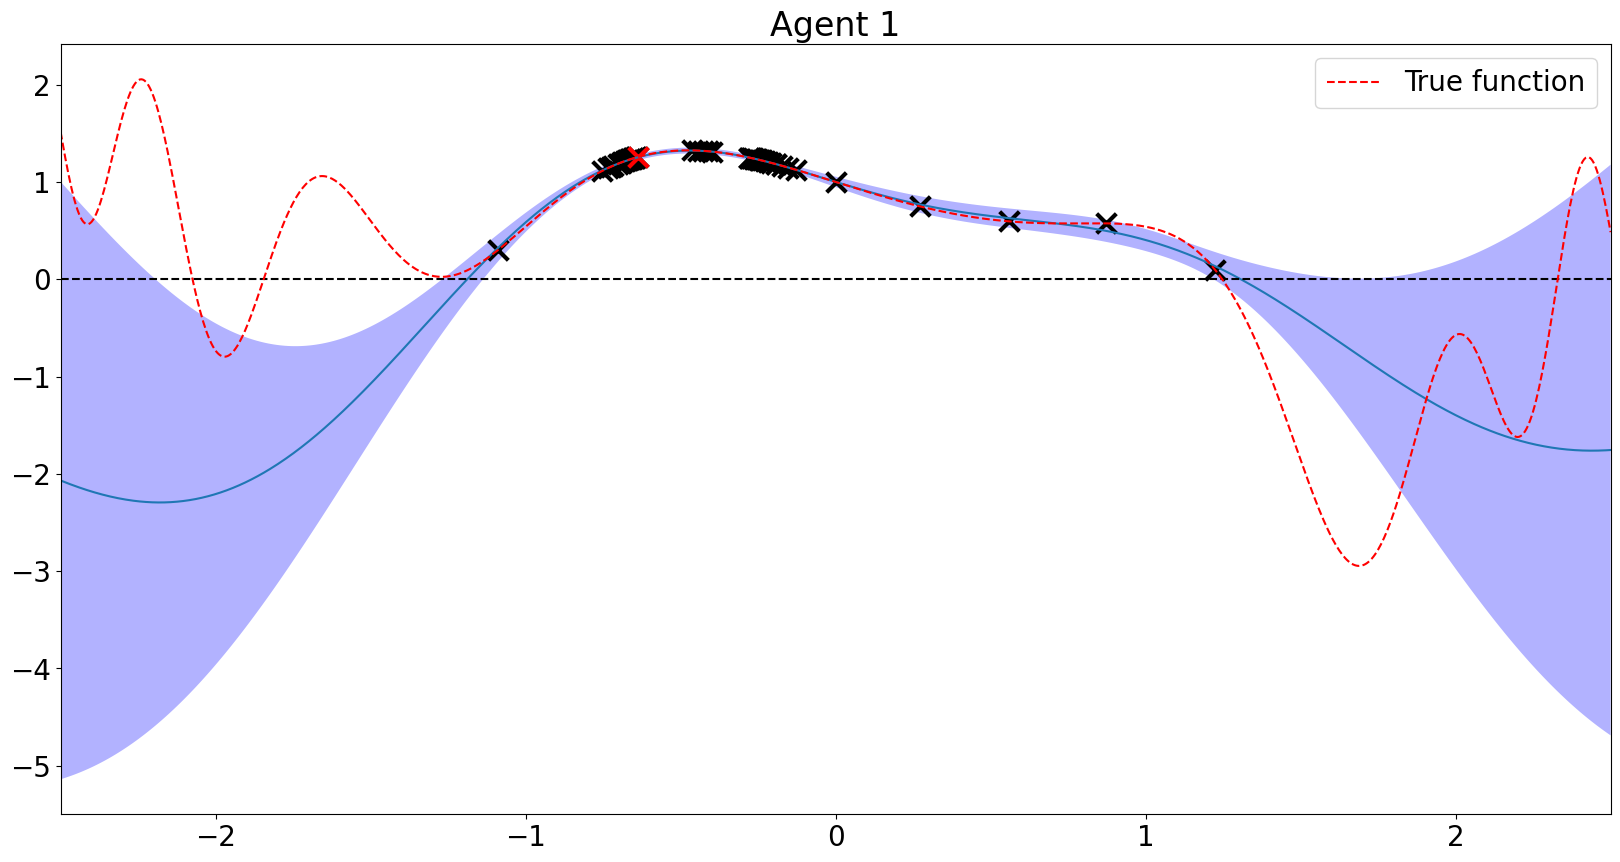

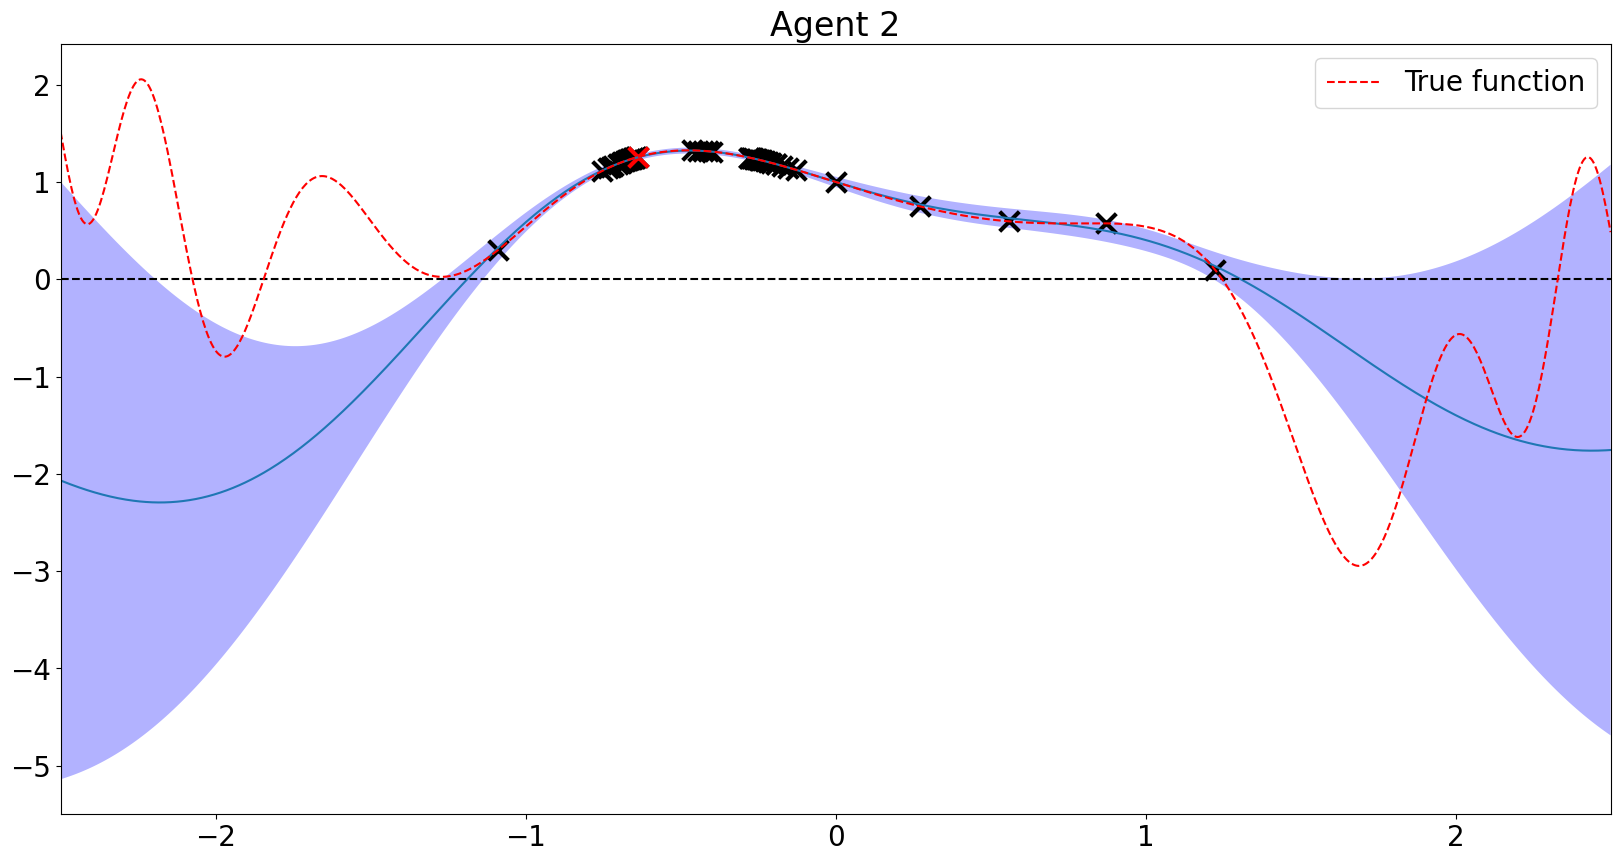

In [4]:
for _ in range(50):

    x_next = [agent.predict() for agent in agents]
    print("Agent predictions: ",x_next[0],x_next[1],x_next[2])
    y_meas = global_function(x_next[0],x_next[1],x_next[2])

    for agent in agents:
        # noise = np.random.normal(0,0.08**2)
        #if 2nd agent 
        agent.update(x_next[agent.id],y_meas)

for agent in agents:
    agent.plot_gp()


In [5]:
# for i in range(20):
#     x_next = [agent.predict() for agent in agents]
#     y_means = global_function(x_next[0], x_next[1], x_next[2])
#     for j, agent in enumerate(agents):
#         agent.update(x_next[j], y_means)


# agent1.plot_gp()
# agent2.plot_gp()
# agent3.plot_gp()

In [6]:
# x_next = [agent.predict() for agent in agents]
# print("Action to take", x_next[0],x_next[1])


# y_means = global_function(x_next[0],x_next[1],x_next[2])
# print(y_means)

# agent1.plot_gp()
# agent2.plot_gp()
# agent3.plot_gp()
